<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# üìù Assignment
---

# Decision Trees(Í≤∞Ï†ïÌä∏Î¶¨)

## Ï∫êÍ∏Ä Ïù∏ÌÅ¥ÎûòÏä§(InClass) Competitions



### 1) EDAÎ•º ÏàòÌñâÌï©ÏãúÎã§


- [Ï∫êÍ∏Ä Í≥ÑÏ†ïÏùÑ ÎßåÎìúÏÑ∏Ïöî](https://www.kaggle.com/), Í≥µÏú†Îêú Ïù∏ÌÅ¥ÎûòÏä§ ÎåÄÌöå urlÏùÑ ÌÜµÌï¥ Ïù¥ÎèôÌïú ÌõÑ ÎåÄÌöåÏóê Ï∞∏Ïó¨ÌïòÏÑ∏Ïöî.
- H1N1 Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†®/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ ÏÖãÏúºÎ°ú ÎÇòÎàÑÏñ¥ Ï§ÄÎπÑÌïòÏÑ∏Ïöî
- profilingÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Í≥†, missing value, zeros, cardinarity Îì±ÏùÑ ÌôïÏù∏ÌïòÏó¨ Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
- Î≥∏Ïù∏ÎßåÏùò ÌäπÏÑ±Í≥µÌïôÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî.
- **(Í∞ùÍ¥ÄÏãù) H1N1 Î∂ÑÎ•òÍ∏∞Ïùò Í∏∞Ï§ÄÎ™®Îç∏ÏùÑ ÏÑ§Ï†ïÌïòÏÑ∏Ïöî. Í∏∞Ï§ÄÎ™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1

#### Îç∞Ïù¥ÌÑ∞ ÏÖã Ï∂îÍ∞Ä Î∞è ÌôïÏù∏

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [3]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [4]:
!pip install pandas-profiling==2.11.0 --upgrade
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# object describe Î≥¥Í∏∞
train.describe(exclude='number').T.sort_values(by='unique', ascending=False)

count  ...   freq
state                        33723  ...    829
employment_occupation        13714  ...   1769
employment_industry          13714  ...   2451
agegrp                       33723  ...   6821
opinion_h1n1_vacc_effective  26637  ...  11710
opinion_h1n1_risk            26602  ...   9980
opinion_h1n1_sick_from_vacc  26568  ...   9229
opinion_seas_vacc_effective  26519  ...  11571
opinion_seas_risk            26466  ...   9057
opinion_seas_sick_from_vacc  26413  ...  11813
employment_status            25466  ...  13722
census_msa                   33723  ...  15202

[12 rows x 4 columns]

In [6]:
selected_cols = train.select_dtypes(include=['number', 'object'])
labels = selected_cols.nunique()
labels[labels < 25].index.tolist()

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_insurance',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'agegrp',
 'education_comp',
 'raceeth4_i',
 'sex_i',
 'inc_pov',
 'marital',
 'rent_own_r',
 'employment_status',
 'census_region',
 'census_msa',
 'n_adult_r',
 'household_children',
 'n_people_r',
 'employment_industry',
 'hhs_region',
 'vacc_h1n1_f']

#### ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ

In [7]:
import numpy as np

# df ÏóîÏßÄÎãàÏñ¥ÎßÅ
def engineer(df) :

  # ÎÜíÏùÄ Ïπ¥ÎîîÎÑêÎ¶¨Ìã∞ ÌäπÏÑ± Ï†úÍ±∞ 
  selected_cols = df.select_dtypes(include=['number','object'])
  labels = selected_cols.nunique()
  features = labels[labels < 25].index.tolist() # Ïπ¥ÎîîÎÑêÎ¶¨Ìã∞ 25 ÎØ∏Îßå ÏÑ†ÌÉù
  df = df[features]

  # behavioral Ï†êÏàò Ïª¨Îüº ÏÉùÏÑ±, Í∏∞Ï°¥ ÌñâÎèô ÌäπÏÑ± Ï†úÍ±∞
  behaviorals = [col for col in df.columns if 'behavioral' in col] 
  df['behaviorals'] = df[behaviorals].sum(axis=1)
  df.drop(columns=behaviorals, inplace=True)

  return df

train = engineer(train)
val = engineer(val)
test = engineer(test)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

h1n1_concern  h1n1_knowledge  ...  vacc_h1n1_f  behaviorals
20365           1.0             1.0  ...            0          0.0
29138           1.0             1.0  ...            1          5.0
36128           2.0             2.0  ...            0          4.0
39793           2.0             1.0  ...            0          3.0
32973           0.0             1.0  ...            0          0.0
...             ...             ...  ...          ...          ...
8747            NaN             NaN  ...            0          0.0
4412            3.0             2.0  ...            0          6.0
19064           NaN             NaN  ...            0          0.0
40906           NaN             NaN  ...            0          0.0
30904           2.0             1.0  ...            0          3.0

[33723 rows x 31 columns]

In [8]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÍ≤üÍ≥º ÌäπÏÑ± Î∂ÑÎ¶¨
features = train.drop(columns=[target]).columns

X_train = train[features]
X_val = val[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]

#### Í∏∞Ï§ÄÎ™®Îç∏ ÏÑ§Ï†ï

In [9]:
# Í∏∞Ï§ÄÎ™®Îç∏ ÏÑ§Ï†ï
y_train.value_counts(normalize=True)
major = y_train.mode()[0] # mode() Í∞ÄÏû• ÏûêÏ£º ÎÇòÌÉÄÎÇòÎäî Í∞í Î¶¨ÌÑ¥
y_pred = [major] * len(y_train)


In [10]:
# ÏµúÎã§ ÌÅ¥ÎûòÏä§Ïùò ÎπàÎèÑÍ∞Ä Ï†ïÌôïÎèÑÍ∞Ä Îê©ÎãàÎã§.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.7609346736648578


### 2) Î™®Îç∏ Í∞úÎ∞ú
- Í≤∞Ï†ïÌä∏Î¶¨Î•º ÌïôÏäµÏãúÌÇµÎãàÎã§. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏàòÏ†ïÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÎÜíÏó¨Î≥¥ÏÑ∏Ïöî. Í≥ºÏ†ÅÌï©ÏùÑ Ï£ºÏùòÌïòÏÑ∏Ïöî!
- Í≤ÄÏ¶ùÏÑ∏Ìä∏ Ïä§ÏΩîÏñ¥Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.(ÌèâÍ∞ÄÏßÄÌëúÎäî F1-scoreÏûÖÎãàÎã§, ÏàòÏãùÏùÄ Ï∫êÍ∏Ä Overview-Evaluation ÌéòÏù¥ÏßÄÎ•º ÌôïÏù∏Ìï¥ Ï£ºÏÑ∏Ïöî. ÌèâÍ∞ÄÏßÄÌëúÏóê ÎåÄÌïú ÎÇ¥Ïö©ÏùÄ Îã§ÏùåÏóê ÏûêÏÑ∏Ìûà Î∞∞Ïö∞Í≥† ÌôúÏö©Ìï† Í≤ÉÏûÖÎãàÎã§ ÏßÄÍ∏àÏùÄ Ïä§ÏΩîÏñ¥Î•º Ïò¨Î¶¨Í∏∞ ÏúÑÌïú ÎÖ∏Î†•ÏùÑ Ï†ÑÌòÄ Í∏∞Ïö∏Ïù¥ÏßÄ ÎßêÍ≥† Í≤∞Ï†ïÌä∏Î¶¨Ïùò Í∞úÎÖêÍ≥º ÏΩîÎìúÏù¥Ìï¥, ÏÇ¨Ïö©Ïóê ÏßëÏ§ëÌïòÏÑ∏Ïöî!)
- ÌäπÏÑ±Ï§ëÏöîÎèÑÎ•º Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥ Î≥¥ÏÑ∏Ïöî
- **Í≤ÄÏ¶ùÏÑ∏Ìä∏Ïùò F1-scoreÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî. (0.5 Ïù¥ÏÉÅ ÌÜµÍ≥º)**

In [11]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
!pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 80 kB 3.2 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Í∏∞Î≥∏ ÏùòÏÇ¨Í≤∞Ï†ïÎ™®Îç∏ Ï†ÅÏö©

In [26]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=7,random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ: ', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: ', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ÌõàÎ†® Ï†ïÌôïÎèÑ:  0.8307090116537674
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:  0.8278970466136876


In [27]:
from sklearn.metrics import f1_score
print('f1_score Ï†êÏàò : ',f1_score(y_val,y_pred))

f1_score Ï†êÏàò :  0.5435671594841145


#### ÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨ ÏÑ±Îä• ÏàòÏ†ï

In [14]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=7, min_samples_leaf=100, random_state=2)
)

pipe.fit(X_train, y_train)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
print('f1_score Ï†êÏàò : ',f1_score(y_val,y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ÌõàÎ†® Ï†ïÌôïÎèÑ 0.8259644752839308
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ 0.8281342663978176
f1_score Ï†êÏàò :  0.5844565529108116


In [15]:
y_pred = pipe.predict(X_test)
# print('f1_score Ï†êÏàò : ',f1_score(y_val,y_pred))
submission = pd.DataFrame(data=[X_test.index,y_pred]).T
submission.columns = ['Id','vacc_h1n1_f']
submission

Id  vacc_h1n1_f
0          0            0
1          1            0
2          2            0
3          3            0
4          4            0
...      ...          ...
28099  28099            0
28100  28100            0
28101  28101            0
28102  28102            0
28103  28103            0

[28104 rows x 2 columns]

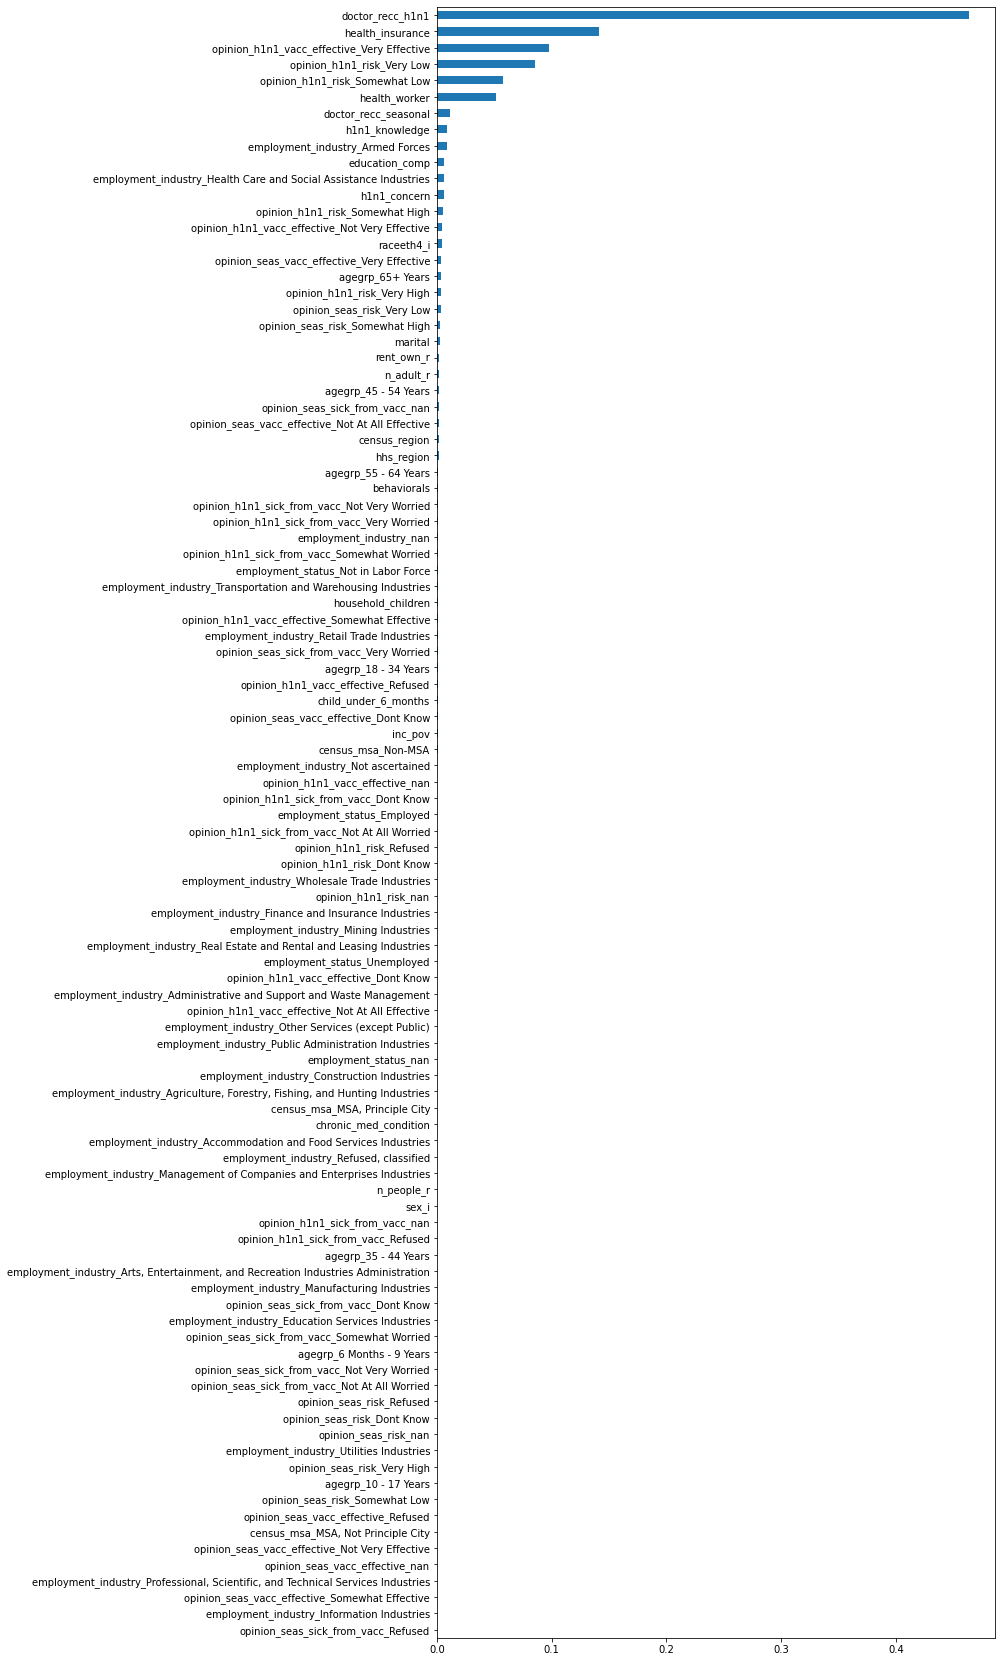

In [30]:
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

### 3) Ï∫êÍ∏Ä ÎåÄÌöå Ï∞∏Ïó¨

- ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï∫êÍ∏ÄÏóê Ï†úÏ∂ú ÌïòÏÑ∏Ïöî.(Ïä§ÏΩîÏñ¥Í∞Ä ÎßéÏù¥ ÎÇÆÍ≤å ÎÇòÏôÄÎèÑ Í≤∞Ï†ïÌä∏Î¶¨Î•º Ïûò Ïù¥Ìï¥ÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎÇ¥ÏóàÎã§Î©¥ Ï∂©Î∂ÑÌï©ÎãàÎã§!)
- **Ï∫êÍ∏Ä LeaderboardÏùò Î≥∏Ïù∏ ScoreÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**
 

In [16]:
submission.to_csv("submission2.csv", mode='w')

## üî• ÎèÑÏ†ÑÍ≥ºÏ†ú

### 4) Îã§Î•∏ Ï¢ÖÎ•òÏùò imputerÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÌäπÏÑ±-ÌÉÄÍ≤ü Í¥ÄÍ≥Ñ Í∑∏ÎûòÌîÑÎ•º ÎÇòÌÉÄÎÇ¥ Î≥¥ÏÑ∏Ïöî.
- Îã§Î•∏ Ï¢ÖÎ•òÏùò imputerÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥ÏÑ∏Ïöî([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots ÏÇ¨Ïö©ÌïòÏó¨ Í¥ÄÏã¨ÏûàÎäî ÌäπÏÑ±Îì§Í≥º targetÍ∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥ Î≥¥ÏÑ∏Ïöî.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [17]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###